# Visualize Predictions

## Parameters

In [1]:
import torch
import numpy as np

# set random seeds
torch.manual_seed(0)

In [2]:
config = '/home/Talen/foragefish_classifier/configs/exp_resnet18.yaml'
split = 'test'

## Load Data

In [3]:
import sys
sys.path.append('/home/Talen/foragefish_classifier')


In [4]:
import yaml
from train import create_dataloader, load_model       # NOTE: since we're using these functions across files, it could make sense to put them in e.g. a "util.py" script.

# load config
print(f'Using config "{config}"')
cfg = yaml.safe_load(open(config, 'r'))


# setup entities
dl_test = create_dataloader(cfg, split='test')

# load model
model, epoch = load_model(cfg)

Using config "/home/Talen/foragefish_classifier/configs/exp_resnet18.yaml"


/home/Talen/miniconda3/envs/cv4ecology2/lib/python3.9/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(
/home/Talen/miniconda3/envs/cv4ecology2/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/Talen/miniconda3/envs/cv4ecology2/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to

## Visualize

This is up to you to figure out now. :)

In [5]:
# setup entities
dl_test = create_dataloader(cfg, split='test')
dataset = dl_test.dataset
filenames = [entry[0] for entry in dataset.data]
print(filenames)

['6155423.jpg', '6154789.jpg', '6154099.jpg', '6155461.jpg', '6155737.jpg', '6155507.jpg', '6154958.jpg', '6155746.jpg', '6155756.jpg', '6155192.jpg', '6153636.jpg', '6155199.jpg', '6154921.jpg', '6155262.jpg', '6155299.jpg', '6155295.jpg', '6155125.jpg', '6155054.jpg', '6154984.jpg', '6155471.jpg', '6155156.jpg', '6155504.jpg', '6154793.jpg', '6155212.jpg', '6154033.jpg', '6155242.jpg', '6155428.jpg', '6155749.jpg', '6154551.jpg', '6153367.jpg', '6155607.jpg', '6156044.jpg', '6153398.jpg', '6154289.jpg', '6154918.jpg', '6154653.jpg', '6154928.jpg', '6154808.jpg', '6155356.jpg', '6155171.jpg', '6154210.jpg', '6154610.jpg', '6155697.jpg', '6154699.jpg', '6153594.jpg', '6153920.jpg', '6154460.jpg', '6153334.jpg', '6153329.jpg', '6155863.jpg', '6154680.jpg', '6154875.jpg', '6154186.jpg', '6155526.jpg']


In [6]:
from tqdm import trange
import torch.nn.functional as F

device = "cuda"
model.to(device) # puts model weights on to gpu
model.eval() # changes model to eval / inference mode


progressBar = trange(len(dl_test))
pred_all = []
argmax_all = []
img_list = []
confs_list = []
for idx, (data, labels) in enumerate(dl_test):       # see the last line of file "dataset.py" where we return the image tensor (data) and label

    # put data and labels on device
    data, labels = data.to(device), labels.to(device)

    # forward pass
    prediction = model(data) 
    # visualize image that's stored in a batch in variable 'data' (this will be a for loop that iterates a batch)
    # use argmax() over the prediction in a single image, apply it to every image's corresponding prediction.
    
    # Now we use argmax() over the prediction pair of numbers, and apply it to every image's corresponding prediction.
    argmax = prediction.argmax(dim=1)

    print(argmax)
    
    # print(argmax)
    argmax_all.extend(argmax.detach().cpu().numpy())

    # Using softmax to get probabilities
    probabilities = F.softmax(prediction, dim=1)

      # get the predicted labels and their confidence scores
    pred_label = torch.argmax(probabilities, dim=1)
    confidence_scores = torch.max(probabilities, dim=1).values
    confidence_scores = confidence_scores.tolist()
    print(confidence_scores)

    

    # store the prediction in a list
    # pred_all.append(prediction.detach().cpu().numpy()[0])
    pred_all.extend(prediction.detach().cpu().numpy())
    img_list.extend(data)
    confs_list.extend(confidence_scores)
    


# step 1 -visualize predictions + ground truth in matplotlib
# Step 2 - look up weights + biases, how to set them up in the model to log during training
# Step 3 - set up experiments so that when I start a new training run, it generates an experimental folder with the right name 
# copy config file to each experiment folder


  0%|          | 0/4 [00:00<?, ?it/s]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
[0.5188919901847839, 0.5471433401107788, 0.5303479433059692, 0.532000720500946, 0.544012725353241, 0.5612373352050781, 0.5176905989646912, 0.5820590257644653, 0.5427684783935547, 0.5132968425750732, 0.544313907623291, 0.6907124519348145, 0.5364940166473389, 0.6312801837921143, 0.5594274401664734, 0.5140877962112427]
tensor([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0], device='cuda:0')
[0.5413113832473755, 0.5199812650680542, 0.5385452508926392, 0.5398607850074768, 0.5752682089805603, 0.5317924618721008, 0.5398184657096863, 0.5128305554389954, 0.5220729112625122, 0.5602210164070129, 0.6276742219924927, 0.5157454609870911, 0.546166181564331, 0.5290625095367432, 0.5034776926040649, 0.5285788774490356]
tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], device='cuda:0')
[0.5230772495269775, 0.5397874712944031, 0.5981089472770691, 0.5279431939125061, 0.5016508102416992, 0.5368531346321106, 0.5466868877410889,

In [7]:
print(pred_all)
#now we make pred_all a numpy array
pred_all = np.array(pred_all)



[array([0.15015574, 0.07455181], dtype=float32), array([ 0.11783242, -0.07130268], dtype=float32), array([0.17293696, 0.05139579], dtype=float32), array([0.14184801, 0.01366979], dtype=float32), array([ 0.15000266, -0.02650503], dtype=float32), array([-0.05129742, -0.29748267], dtype=float32), array([0.15536533, 0.08457339], dtype=float32), array([ 0.1492445 , -0.18198717], dtype=float32), array([-0.09757998, -0.2690729 ], dtype=float32), array([0.14188305, 0.08868304], dtype=float32), array([ 0.14931683, -0.02840529], dtype=float32), array([ 0.26962996, -0.53382224], dtype=float32), array([0.14747956, 0.00124345], dtype=float32), array([ 0.26806745, -0.2696455 ], dtype=float32), array([ 0.20265429, -0.03618445], dtype=float32), array([ 0.0371504 , -0.01921566], dtype=float32), array([0.20082243, 0.03519931], dtype=float32), array([-0.06625349,  0.01371408], dtype=float32), array([0.22960617, 0.07511871], dtype=float32), array([0.18475541, 0.02497337], dtype=float32), array([ 0.202857 

In [8]:
"""
This section of code simply creates a list of confidence scores for each image in the dataset 
by calculating the difference between the highest and second highest prediction values for each image 
(there's only two values right now, but we may have more in the future).
"""

# Now we can use the info in pred_all to calculate a confidence score for each image in the dataset:
# now we'll write the code to do this:
# we'll calculate the confidence score for each image in the dataset.
# confidence score = max(prediction) - second_max(prediction)
# we'll store this in a list called confidence_scores
# confidence_scores = []
# for i in range(len(pred_all)):
#     # we'll use numpy's argsort() function to get the indices of the sorted array
#     sorted_indices = np.argsort(pred_all[i])
#     # we'll get the two highest values from the sorted array
#     highest = sorted_indices[-1]
#     second_highest = sorted_indices[-2]
#     # we'll calculate the confidence score
#     confidence_score = pred_all[i][1] - pred_all[i][0]  # positive for class 1, negative for class 0
#     # we'll store the confidence score in the list
#     confidence_scores.append(confidence_score)

# # now we'll print the confidence scores
# print(confidence_scores)

"\nThis section of code simply creates a list of confidence scores for each image in the dataset \nby calculating the difference between the highest and second highest prediction values for each image \n(there's only two values right now, but we may have more in the future).\n"

In [9]:
# Now we make a list of our ground-truth labels:
gt_all = []
for idx, (data, labels) in enumerate(dl_test):
     gt_all.extend(labels.detach().cpu().numpy())

print(gt_all)

# Now we check the type of gt_all:
type(gt_all)

[np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]


list

In [10]:
import pandas as pd
import numpy

# Convert lists to numpy arrays for consistent handling
# confidence_scores = np.array(confidence_scores)
argmax_all = np.array(argmax_all)
gt_all = np.array(gt_all)

# Create DataFrame with all components
df_combined = pd.DataFrame({
    # 'confidence_scores': confidence_scores.tolist(),  # Convert to list for DataFrame
    'predict_class': argmax_all,
    'ground_truth': gt_all,
    'image_id': range(len(img_list)),
    'filenames':np.array(filenames),
    'confs':confs_list
})

# Set image_id as index
df_combined.set_index('image_id', inplace=True)

# Verify structure
print("DataFrame shape:", df_combined.shape)
print("\nFirst few rows:")
print(df_combined.head())

DataFrame shape: (54, 4)

First few rows:
          predict_class  ground_truth    filenames     confs
image_id                                                    
0                     0             0  6155423.jpg  0.518892
1                     0             0  6154789.jpg  0.547143
2                     0             1  6154099.jpg  0.530348
3                     0             1  6155461.jpg  0.532001
4                     0             1  6155737.jpg  0.544013


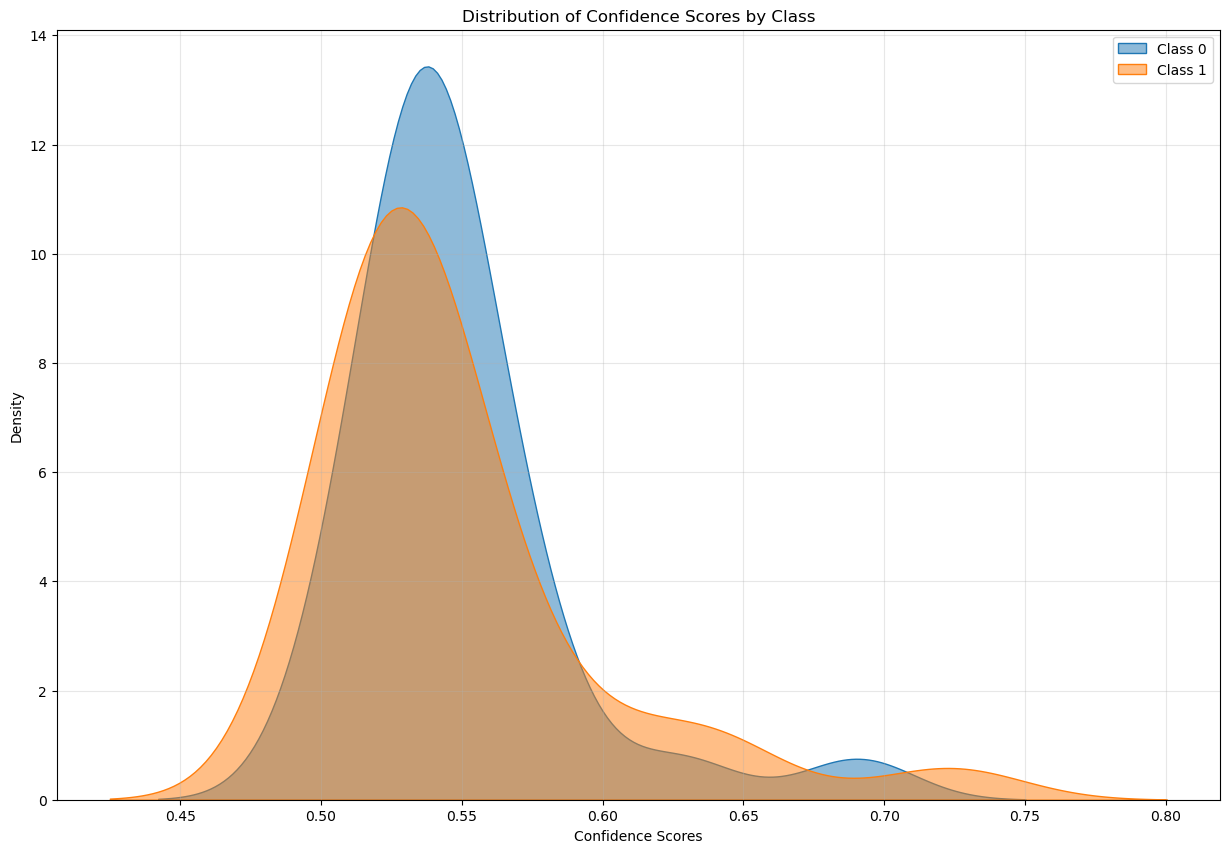

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set figure size
plt.figure(figsize=(15, 10))

# Create density plots with filled areas
for gt_class in df_combined['ground_truth'].unique():
    # Get confidence scores for this class
    class_scores = df_combined[df_combined['ground_truth'] == gt_class]['confs']
    
    # Plot density with filled area
    sns.kdeplot(data=class_scores, 
                fill=True,  # Fill area under curve
                alpha=0.5,  # Transparency
                label=f'Class {gt_class}')

# Customize plot
plt.xlabel('Confidence Scores')
plt.ylabel('Density')
plt.title('Distribution of Confidence Scores by Class')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

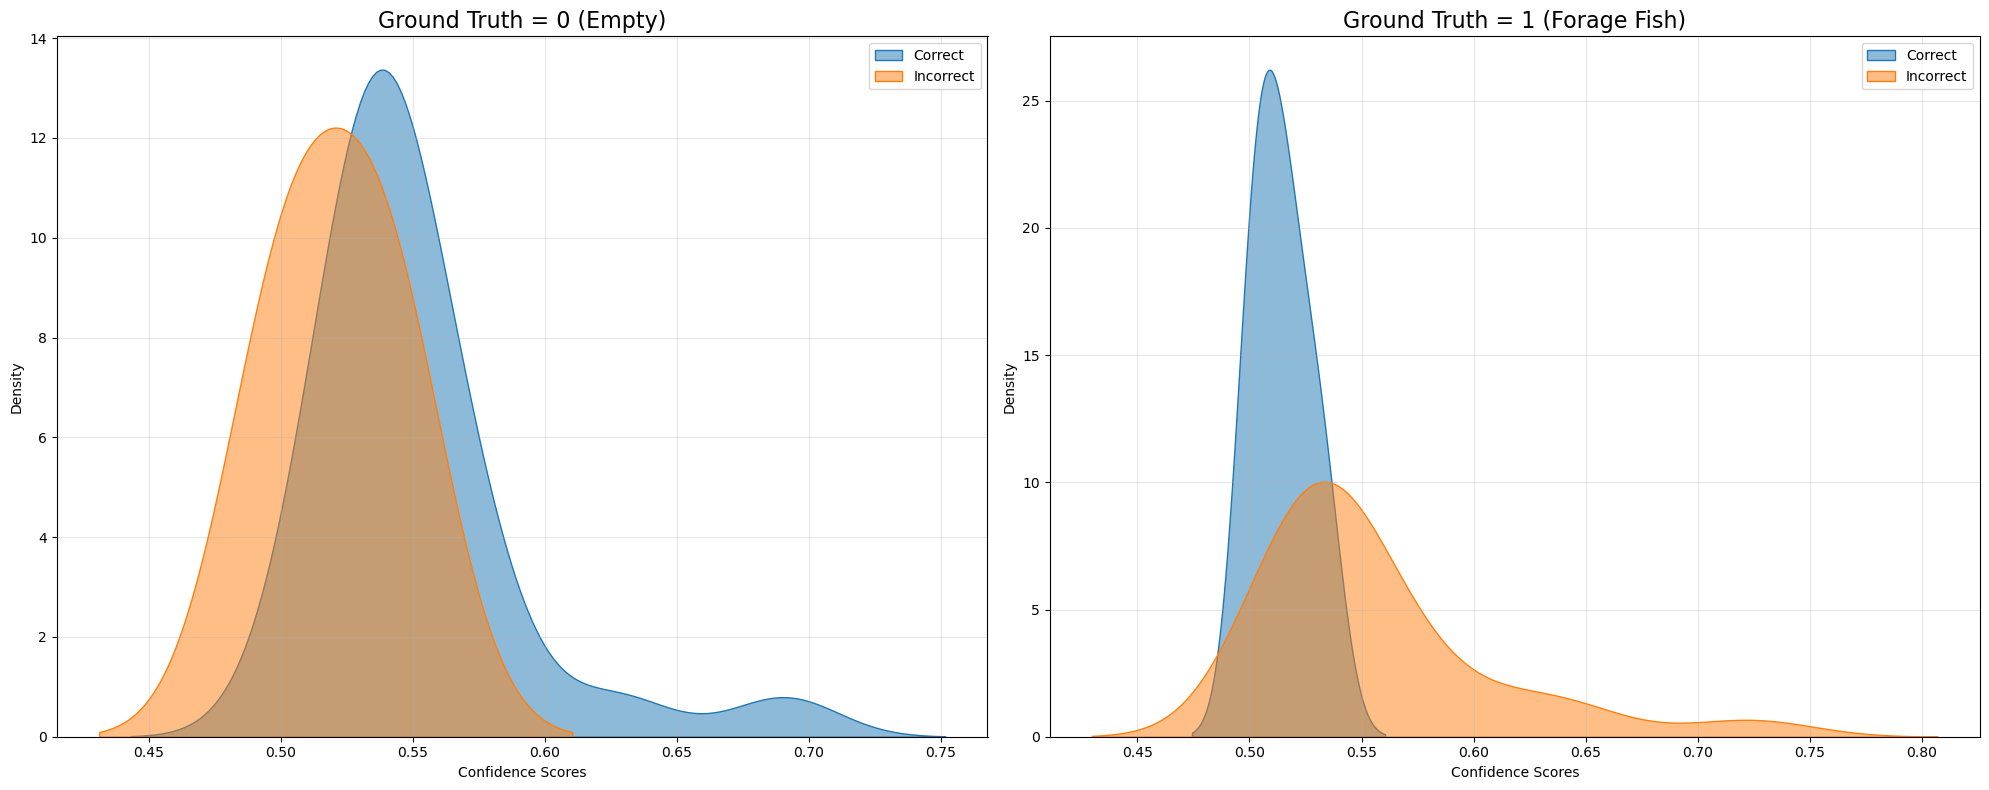

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create figure with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Panel 1: ground_truth = 0
data_gt0 = df_combined[df_combined['ground_truth'] == 0]
correct_gt0 = data_gt0[data_gt0['ground_truth'] == data_gt0['predict_class']]['confs']
incorrect_gt0 = data_gt0[data_gt0['ground_truth'] != data_gt0['predict_class']]['confs']

sns.kdeplot(data=correct_gt0, fill=True, alpha=0.5, label='Correct', ax=ax1)
sns.kdeplot(data=incorrect_gt0, fill=True, alpha=0.5, label='Incorrect', ax=ax1)
ax1.set_title('Ground Truth = 0 (Empty)', fontsize=16)
ax1.set_xlabel('Confidence Scores')
ax1.set_ylabel('Density')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Panel 2: ground_truth = 1
data_gt1 = df_combined[df_combined['ground_truth'] == 1]
correct_gt1 = data_gt1[data_gt1['ground_truth'] == data_gt1['predict_class']]['confs']
incorrect_gt1 = data_gt1[data_gt1['ground_truth'] != data_gt1['predict_class']]['confs']

sns.kdeplot(data=correct_gt1, fill=True, alpha=0.5, label='Correct', ax=ax2)
sns.kdeplot(data=incorrect_gt1, fill=True, alpha=0.5, label='Incorrect', ax=ax2)
ax2.set_title('Ground Truth = 1 (Forage Fish)', fontsize=16)
ax2.set_xlabel('Confidence Scores')
ax2.set_ylabel('Density')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

In [13]:
print(df_combined)


# Now we visualize the predictions and ground truth in matplotlib

# import matplotlib.pyplot as plt
# import numpy as np

# Let's visualize the first 10 images
# for i in range(10):
#     plt.imshow(data[i].permute(1,2,0))
#     plt.title(f'Ground truth: {gt_all[i]}, Prediction: {argmax_all[i]}')
#     plt.show()

# Now lets visualize all images in the dataset, with their ground truth and predictions:
# for i in range(len(df)):
#     plt.imshow(data[i].permute(1,2,0))
#     plt.title(f'Ground truth: {gt_all[i]}, Prediction: {argmax_all[i]}')
#     plt.show()



# This visualizes one batch of images, but we want to visualize all images in the dataset.

# for i in range(len(df)):
#     plt.imshow(img_list[i].cpu().permute(1,2,0))
#     plt.title(f'Ground truth: {gt_all[i]}, Prediction: {argmax_all[i]}')
#     plt.show()


     

          predict_class  ground_truth    filenames     confs
image_id                                                    
0                     0             0  6155423.jpg  0.518892
1                     0             0  6154789.jpg  0.547143
2                     0             1  6154099.jpg  0.530348
3                     0             1  6155461.jpg  0.532001
4                     0             1  6155737.jpg  0.544013
5                     0             1  6155507.jpg  0.561237
6                     0             1  6154958.jpg  0.517691
7                     0             0  6155746.jpg  0.582059
8                     0             0  6155756.jpg  0.542768
9                     0             1  6155192.jpg  0.513297
10                    0             1  6153636.jpg  0.544314
11                    0             0  6155199.jpg  0.690712
12                    0             0  6154921.jpg  0.536494
13                    0             1  6155262.jpg  0.631280
14                    0 

In [14]:
# Same thing now but in a smaller grid

def display_batch(img_list, gt_all, argmax_all, start_idx=0):
    # Create 4x3 grid with adjusted figure size
    fig, axes = plt.subplots(4, 3, figsize=(12, 16))
    axes = axes.ravel()
    
    # Display up to 12 images per batch
    for i in range(12):
        idx = start_idx + i
        if idx >= len(img_list):
            break
            
        # Display image and labels
        axes[i].imshow(img_list[idx].cpu().permute(1,2,0))
        axes[i].set_title(f'Image {idx}\nGT: {gt_all[idx]}\nPred: {argmax_all[idx]}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Display all images in batches of 12
for batch_start in range(0, len(df), 12):
    display_batch(img_list, gt_all, argmax_all, batch_start)

NameError: name 'df' is not defined